In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv
/kaggle/input/knneigbor/knn.PNG


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## A. Exploratory Data Analysis

In [3]:
df= pd.read_csv("../input/social-network-ads/Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.corr() # Lets look at statistical correlation
#There is positive high correlation between Age and Purchased items

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<AxesSubplot:>

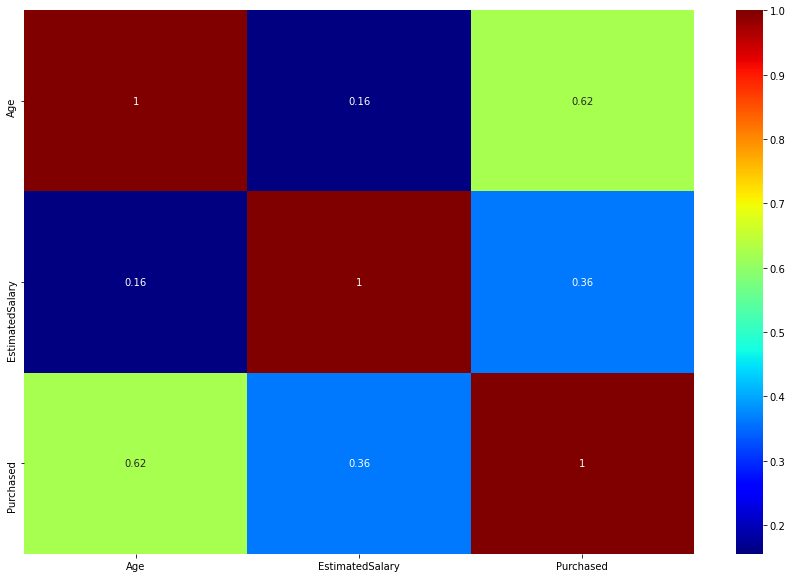

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="jet",annot=True)
#here we visualize the correlations

<AxesSubplot:xlabel='Age', ylabel='count'>

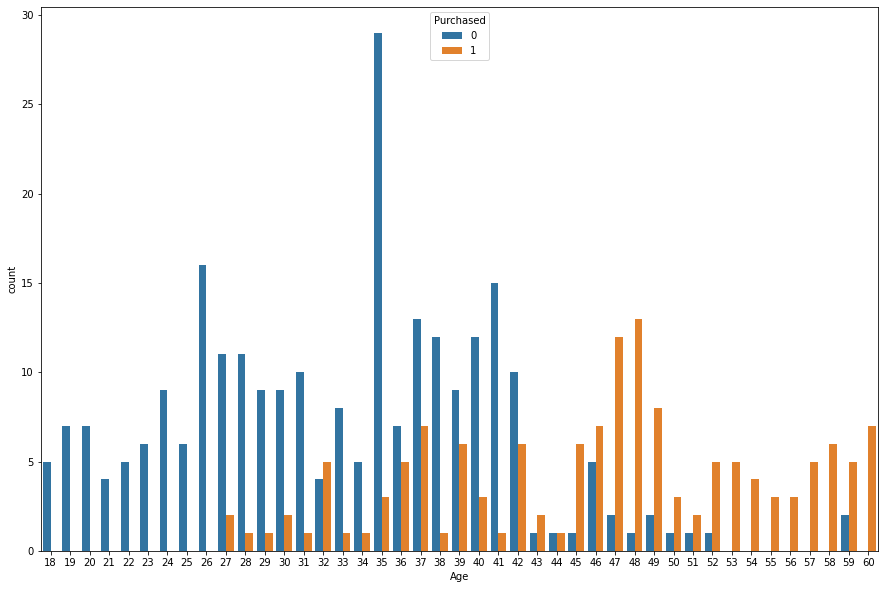

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x="Age",hue="Purchased")
#We can see that the effects of ads is highest between ages 26 and 40
#Therefore these ge groups are more suitable to be target group for the commercial ads

In [7]:
df.isnull().sum() # we do not have any missing values

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.info() # we do not have any non numerical values in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## B. Preparing Data For Algorithms

1. Splitting Data into Train and Test Sets

In [9]:
X = df.drop("Purchased",axis=1).values
X.shape

(400, 2)

In [10]:
y = df["Purchased"].values
y.shape

(400,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
X_train.shape

(300, 2)

In [13]:
y_train.shape

(300,)

In [14]:
X_test.shape

(100, 2)

In [15]:
y_test.shape

(100,)

2.Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)
X_train
#We rescale all of the features with standart scaler which produces values between -1 and 1
#This secures there is no value gap between features 

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

## C. Training Classification Algorithms

## 1. Logistic Regression:

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic= LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [19]:
predictions_logistic= logistic.predict(X_test)

Evaluation of the Performance of Logistic Regression

In [20]:
df1=pd.DataFrame(y_test,columns=["Original Values"])
df2=pd.DataFrame(predictions_logistic,columns=[ "Predictions of Logistic regression"])
pd.concat([df1,df2],axis=1) 
#Here we can compare the predictions of our model with the actual values

,Original Values,Predictions of Logistic regression
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test, predictions_logistic))
print(confusion_matrix(y_test, predictions_logistic))
print(accuracy_score(y_test, predictions_logistic))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

[[65  3]
 [ 8 24]]
0.89


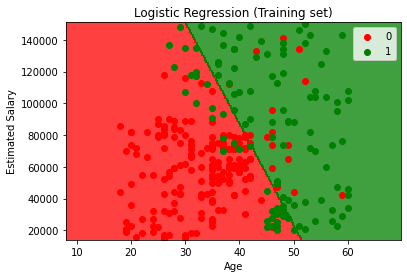

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, logistic.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
#Visualization of the predictions of the Logistic Regression in Train Set

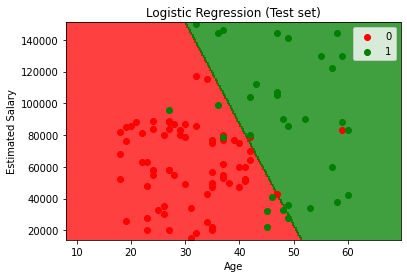

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, logistic.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
#Visualization of the predictions of the Logistic Regression in Test Set

## 2. K Nearest Neighbors:

How Algorithm Works:

*K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Firstly we store all the dataSecondly we calculate the data from x to all points in our data set, x indicationg particular new data point Then we sort the points near data by increasing distance from xFinally we predict the majority label of K, which is number and represent closest points

*Choosing a K will effect what class a new point is assigned to: if we choose k=3, then the algorithm looks at the three nearest neighbors to this new point if we set k=6, then the algorithm looks at the six nearest neighbors to this new point and decide according to the majority of these 6 neighbors. If we set larger k values,we get a cleaner cutoff at the expense of mislabelling some points

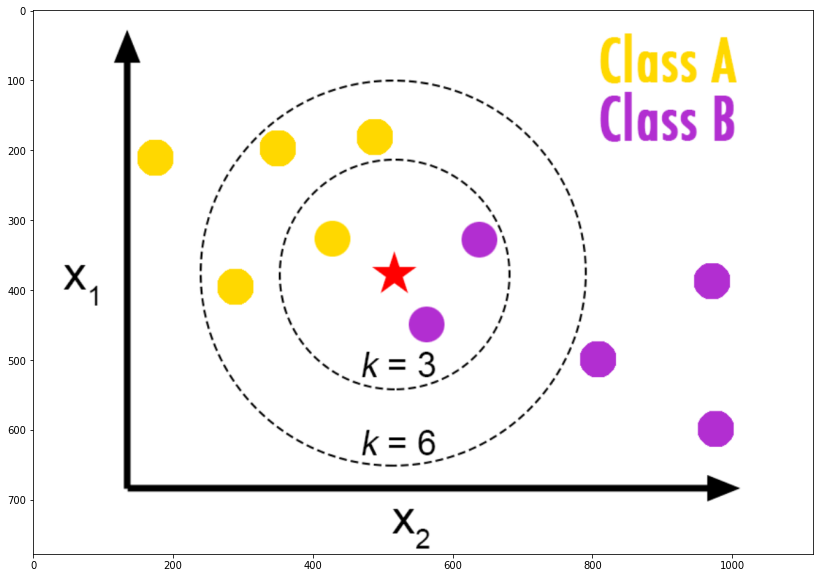

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/knneigbor/knn.PNG"))

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.Therefore, the value of k is very important for our model's success.

In [25]:
from sklearn.neighbors import KNeighborsClassifier


Choosing true k value is very important. Instead of using different k vlaues which will be time consuming, we can use a function in order to choose the best k.

In [26]:
error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

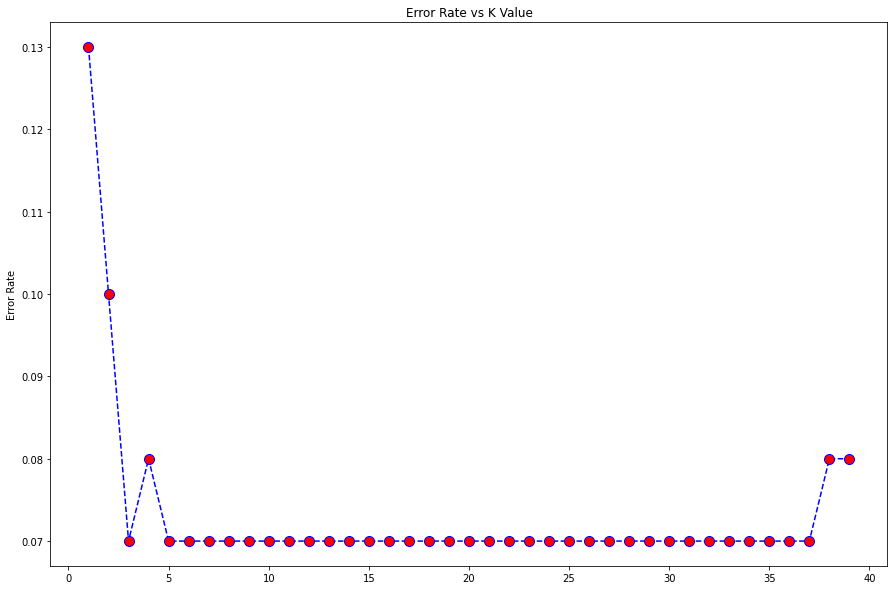

In [27]:
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

As we can see in the figure above, k between 5 and 37 gives the least error rate,so we will use it for better predictions

In [28]:
knn=KNeighborsClassifier(n_neighbors=5) # we choose 5 as neigbor parameter
knn.fit(X_train,y_train)
knn_predictions=knn.predict(X_test)

Evaluation of the Performance of  K Neares Neighbors

In [29]:
df1=pd.DataFrame(y_test,columns=["Original Values"])
df2=pd.DataFrame(knn_predictions,columns=[ "Predictions of KNN"])
pd.concat([df1,df2],axis=1) 

,Original Values,Predictions of KNN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


In [30]:
print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print(accuracy_score(y_test, knn_predictions))
#KNN has higher performance than Logistic Regression in this dataset

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

[[64  4]
 [ 3 29]]
0.93


Visualization of Training Set Results

TypeError: 'str' object is not callable

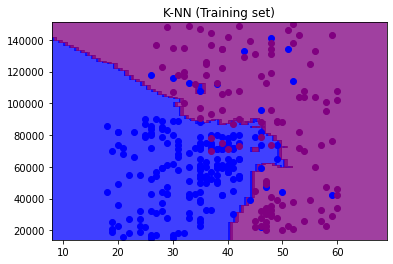

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'purple'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results

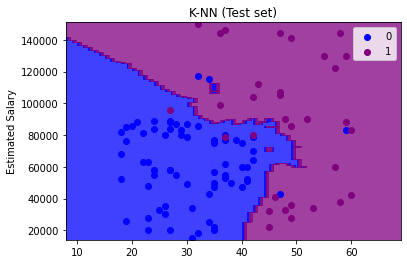

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'purple'))(i), label = j)
plt.title('K-NN (Test set)')
#plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3. Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions= dtree.predict(X_test)

In [34]:
df1=pd.DataFrame(y_test,columns=["Original Values"])
df2=pd.DataFrame(dtree_predictions,columns=[ "Predictions of Decision Tree Classifier"])
pd.concat([df1,df2],axis=1) 

,Original Values,Predictions of Decision Tree Classifier
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


In [35]:
print(classification_report(y_test, dtree_predictions))
print(confusion_matrix(y_test, dtree_predictions))
print(accuracy_score(y_test, dtree_predictions))
#Decision has higher performance than Logistic Regression, but lower than KNN  in this dataset

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

[[62  6]
 [ 4 28]]
0.9


Visualising the Training set results

TypeError: 'str' object is not callable

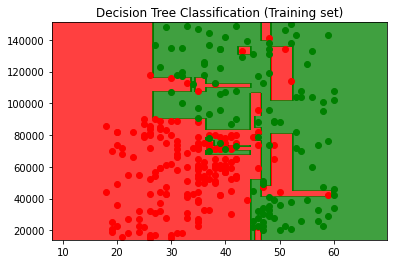

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, dtree.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results


TypeError: 'str' object is not callable

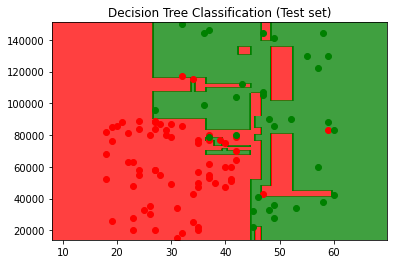

In [37]:
X_set, y_set = ss.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, dtree.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend

## 4. Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)
random_predictions= random.predict(X_test)

In [39]:
df1=pd.DataFrame(y_test,columns=["Original Values"])
df2=pd.DataFrame(random_predictions,columns=[ "Predictions of Random Forest Classifier"])
pd.concat([df1,df2],axis=1) 

,Original Values,Predictions of Random Forest Classifier
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


In [40]:
print(classification_report(y_test, random_predictions))
print(confusion_matrix(y_test, random_predictions))
print(accuracy_score(y_test, random_predictions))
#Random Forest has the second best position after K Nearest Neighbors Algorithm

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

[[63  5]
 [ 4 28]]
0.91


Visualising the Training set results

TypeError: 'str' object is not callable

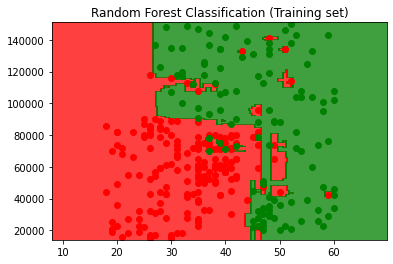

In [41]:

X_set, y_set = ss.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, random.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results